In [1]:
# import libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:

# Load the iris dataset
df = pd.read_csv('Iris.csv')


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])


In [ ]:
# Elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


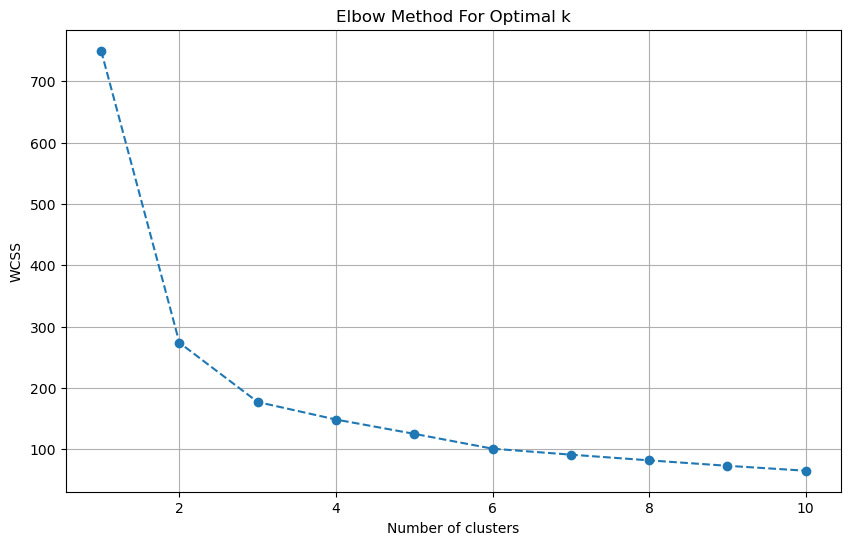

In [8]:
# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Applying KMeans to the dataset with the optimal number of clusters
optimal_clusters = 3  # This is determined from the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

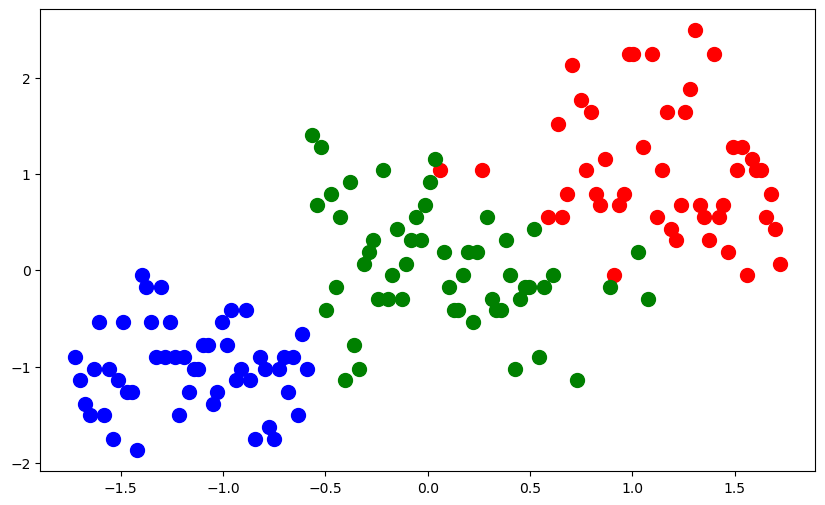

In [10]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[df['Cluster'] == 0, 0], scaled_data[df['Cluster'] == 0, 1], 
            s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[df['Cluster'] == 1, 0], scaled_data[df['Cluster'] == 1, 1], 
            s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data[df['Cluster'] == 2, 0], scaled_data[df['Cluster'] == 2, 1], 
            s=100, c='green', label='Cluster 3')

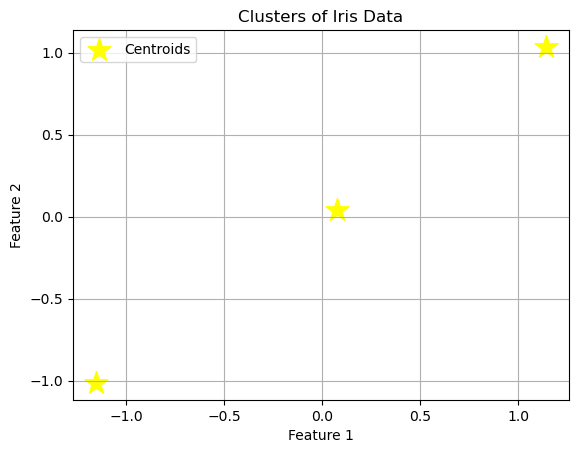

In [11]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Clusters of Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()